In [ ]:

#STABILITY VS synaptic coupling RESTART RUNTIME!!!!!!


#reference data
#N=100
#beta =50
# f=0.8
# sigma_e_2 = 0.005
# sigma_i_2 = 0.005
# mu_e= 0.08 
# mu_i= -f/(1-f)*mu_e


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal
from scipy.fft import fftshift

import networkx as nx
import numpy as np
import pandas as pd

T = 500
Q = 5#trials
dt=0.1




#resonse function of neurons
def F(u,h):
  output =0.5*(1+special.erf(beta*(u+h)))#np.tanh(beta*u)# 1/(1+np.exp(-beta*u))
  return output


mu=np.arange(0,0.25,0.05)

lyapunov_u=np.zeros((len(mu),Q))
lyapunov_v=np.zeros((len(mu),Q))

for s in range(len(mu)):  
  for q in range(Q):
    N= 100
    d=-1
    beta=50
    D =0.000001
    rho =0.05 #connectoin probability
    f=0.8#proportion of e vs i cells/cortical
    sigma_e_2 = 0.005
    sigma_i_2 = 0.005
    #AXEL: INCREASE MU_E TO INCREASE INSTABILITY AND FLUCTUATIONS AMPLITUDE
    mu_e= mu[s] #0.08 so that the variance scales like 1/N
    mu_i= -f/(1-f)*mu_e

    W = np.zeros((N,N))
    M_e=np.random.normal(mu_e, np.sqrt(sigma_e_2), size=(N,N))
    M_i=np.random.normal(mu_i, np.sqrt(sigma_i_2), size=(N,N))

    List = np.zeros(N);
    for i in range(N):
      for j in range(N):
        P_connectivity = np.random.rand()
        if (P_connectivity<rho):
          if (j<int(f*N)):
            List[j] = M_e[i][j];
          else:
            List[j] = M_i[i][j];
        else:
          List[j] = 0;
      np.random.shuffle(List)  
      for j in range(N):
        if i==j:
          W[i][j]=0
        else:
          W[i][j]=List[j]
    row_sum=np.zeros(N)
    for i in range(N):
      row_sum[i] =(np.sum(W[i][:]))
      number_of_nonzero_entries=0
      for j in range(N):
        if W[i][j]!=0:
          number_of_nonzero_entries = number_of_nonzero_entries+1
      for j in range(N):
        if W[i][j]!=0:  
          W[i][j]=W[i][j]-row_sum[i]/number_of_nonzero_entries
    u = np.zeros((N,T))
    v=  np.zeros((N,T))
   
    threshold_u = np.zeros(N)
    threshold_v = np.zeros(N)
    #Euler integration
    for i in range(N):
      u[i][0] = 0.05*np.random.normal(0,1)
      v[i][0] = 0.05*np.random.normal(0,1)
      threshold_u[i] = 0#1*np.random.normal(0,1)
      threshold_v[i] = np.sqrt(1)*np.random.normal(0,1)
    for t in range(T-1):
      for i in range(N):
        sum=0
        sum2=0
        for j in range(N):
          sum=sum+W[i][j]*F(u[j][t],threshold_u[j])
          sum2=sum2+W[i][j]*F(v[j][t],threshold_v[j])
        u[i][t+1] = u[i][t] +dt*(d*u[i][t]+sum)+np.sqrt(2*D*dt)*np.random.normal(0,1)
        v[i][t+1] = v[i][t] +dt*(d*v[i][t]+sum2)+np.sqrt(2*D*dt)*np.random.normal(0,1)
    lyapunov_u[s][q] =0
    lyapunov_v[s][q] =0
    for i in range(N):
       lyapunov_u[s][q] = lyapunov_u[s][q]+1/N*np.max(np.log(np.abs(np.diff(u[i][int(T/2):int(T)])/0.01)))
       lyapunov_v[s][q] = lyapunov_v[s][q]+1/N*np.max(np.log(np.abs(np.diff(v[i][int(T/2):int(T)])/0.01)))
    print(lyapunov_u[s][q], lyapunov_v[s][q],)







-0.40304291310936313 -1.9861667095814124
-0.8895501285357178 -1.9863139241110768
-1.0271653656956796 -1.990569852931617
-1.209440756645824 -1.9789029970072547
-1.3849650324377332 -1.9715974233114153
-0.7632365701152449 -1.9553609272907393
-0.15020957085637127 -1.9884391646122725
-0.2753604074895793 -1.990715693490334
0.23612984027681858 -1.9595010814386387
-0.15588755905153312 -1.9725954960274306
-0.10352339231093474 -1.9562375970422798
0.18898314045771 -1.9777014031700801
0.6565575321505963 -1.9583729262803
-0.8477816819439719 -1.9487322896744366
0.15739952843468427 -1.9718175417070911
0.6037261087757361 -1.9577171490699734
0.86139587224108 -1.8809234249381845
0.8585473319052009 -1.955956950585951
0.7214789828910432 -1.960592379419849
-0.7857772975915917 -1.9829813222813972
-1.0862058455675832 -1.1354092719282556
0.9627236459590485 -1.9591195270425643
0.6079438822736578 -1.9839904764511263
1.0289685370458206 -1.920383957070803
0.9782804090949963 -1.9926611595479262


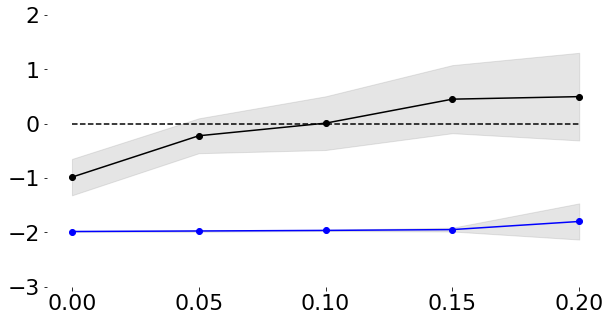

In [ ]:
  
mean_lyapunov = np.zeros(len(mu))
var_lyapunov = np.zeros(len(mu))
mean_lyapunov_h = np.zeros(len(mu))
var_lyapunov_h = np.zeros(len(mu))
for i in range(len(mu)):
    mean_lyapunov[i] = np.mean(lyapunov_u[i][0:Q])
    var_lyapunov[i] = np.var(lyapunov_u[i][0:Q])
    mean_lyapunov_h[i] = np.mean(lyapunov_v[i][0:Q])
    var_lyapunov_h[i] = np.var(lyapunov_v[i][0:Q])
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,5))
plt.plot(mu,mean_lyapunov,'o-', color='black')
plt.plot(mu,mean_lyapunov_h,'o-', color='blue')
plt.plot(mu,np.zeros(len(mu)),'--', color='Black')
plt.fill_between(mu, mean_lyapunov - np.sqrt(var_lyapunov), mean_lyapunov + np.sqrt(var_lyapunov),
                 color='gray', alpha=0.2)
plt.fill_between(mu, mean_lyapunov_h - np.sqrt(var_lyapunov_h), mean_lyapunov_h + np.sqrt(var_lyapunov_h),
                 color='gray', alpha=0.2)
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)

plt.ylim(-3,2)
plt.show()


In [ ]:

#STABILITY VS connection probability  rESTART RUNTIME!!!!!!



#reference data
#N=100
#beta =50
# f=0.8
# sigma_e_2 = 0.005
# sigma_i_2 = 0.005
# mu_e= 0.08 
# mu_i= -f/(1-f)*mu_e


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal
from scipy.fft import fftshift

import networkx as nx
import numpy as np
import pandas as pd

T = 500
Q = 5#trials
dt=0.1




#resonse function of neurons
def F(u,h):
  output =0.5*(1+special.erf(beta*(u+h)))#np.tanh(beta*u)# 1/(1+np.exp(-beta*u))
  return output


connection_probability=np.arange(0,0.25,0.05)

lyapunov_u=np.zeros((len(connection_probability),Q))
lyapunov_v=np.zeros((len(connection_probability),Q))

for s in range(len(connection_probability)):  
  for q in range(Q):
    N= 100
    d=-1
    beta=50
    D =0.000001
    rho =connection_probability[s] #connectoin probability
    f=0.8#proportion of e vs i cells/cortical
    sigma_e_2 = 0.005
    sigma_i_2 = 0.005
  
    mu_e= 0.08 #0.08 so that the variance scales like 1/N
    mu_i= -f/(1-f)*mu_e

    W = np.zeros((N,N))
    M_e=np.random.normal(mu_e, np.sqrt(sigma_e_2), size=(N,N))
    M_i=np.random.normal(mu_i, np.sqrt(sigma_i_2), size=(N,N))

    List = np.zeros(N);
    for i in range(N):
      for j in range(N):
        P_connectivity = np.random.rand()
        if (P_connectivity<rho):
          if (j<int(f*N)):
            List[j] = M_e[i][j];
          else:
            List[j] = M_i[i][j];
        else:
          List[j] = 0;
      np.random.shuffle(List)  
      for j in range(N):
        if i==j:
          W[i][j]=0
        else:
          W[i][j]=List[j]
    row_sum=np.zeros(N)
    for i in range(N):
      row_sum[i] =(np.sum(W[i][:]))
      number_of_nonzero_entries=0
      for j in range(N):
        if W[i][j]!=0:
          number_of_nonzero_entries = number_of_nonzero_entries+1
      for j in range(N):
        if W[i][j]!=0:  
          W[i][j]=W[i][j]-row_sum[i]/number_of_nonzero_entries
    u = np.zeros((N,T))
    v=  np.zeros((N,T))
   
    threshold_u = np.zeros(N)
    threshold_v = np.zeros(N)
    #Euler integration
    for i in range(N):
      u[i][0] = 0.05*np.random.normal(0,1)
      v[i][0] = 0.05*np.random.normal(0,1)
      threshold_u[i] = 0#1*np.random.normal(0,1)
      threshold_v[i] = np.sqrt(1)*np.random.normal(0,1)
    for t in range(T-1):
      for i in range(N):
        sum=0
        sum2=0
        for j in range(N):
          sum=sum+W[i][j]*F(u[j][t],threshold_u[j])
          sum2=sum2+W[i][j]*F(v[j][t],threshold_v[j])
        u[i][t+1] = u[i][t] +dt*(d*u[i][t]+sum)+np.sqrt(2*D*dt)*np.random.normal(0,1)
        v[i][t+1] = v[i][t] +dt*(d*v[i][t]+sum2)+np.sqrt(2*D*dt)*np.random.normal(0,1)
    lyapunov_u[s][q] =0
    lyapunov_v[s][q] =0
    for i in range(N):
       lyapunov_u[s][q] = lyapunov_u[s][q]+1/N*np.max(np.log(np.abs(np.diff(u[i][int(T/2):int(T)])/0.01)))
       lyapunov_v[s][q] = lyapunov_v[s][q]+1/N*np.max(np.log(np.abs(np.diff(v[i][int(T/2):int(T)])/0.01)))
    print(lyapunov_u[s][q], lyapunov_v[s][q],)







-1.9951083439988624 -1.9869427684362986
-1.9762429848581415 -1.985622219246397
-1.9924346618716793 -1.9691183117281708
-1.950096917555653 -2.0085031155551225
-1.9840042115214516 -1.9809135394320863
0.5797865772400227 -1.9465170749417362
0.28256733475550994 -1.9632070392690826
0.361568889843791 -1.9451469828172505
0.38901941204880963 -1.9734215744778996
0.1389733757268836 -1.9564160476188068
0.9075133591787068 -1.9853364217435212
1.0679747164767603 -1.9617862766515006
1.079140069264713 -1.9798525705708847
1.223132682636203 -1.86020035761637
1.2561485190802126 -1.9743778799715495
1.5788301148413248 -1.9394922423570427
1.644160872754152 -1.9531897539619312
1.657500858933245 -1.8331315480819275
1.5108419018828165 -1.9519344937501184
1.6323660559709738 -1.9689387505037605
1.69472569388078 -1.042098186285803
1.408816756972369 -1.9488231878962
1.744973571256794 -1.9825690459551397
1.7721265658033911 -1.9512950463406
1.3282257476626527 -1.9760830735300905


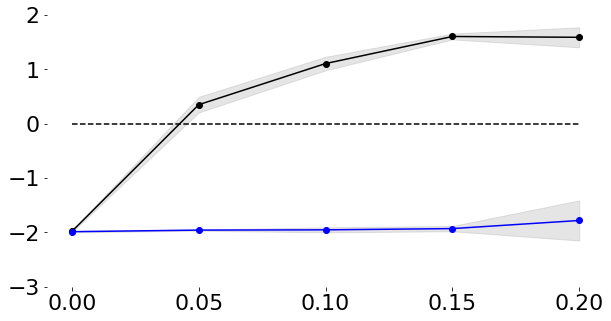

In [ ]:

mean_lyapunov = np.zeros(len(connection_probability))
var_lyapunov = np.zeros(len(connection_probability))
mean_lyapunov_h = np.zeros(len(connection_probability))
var_lyapunov_h = np.zeros(len(connection_probability))
for i in range(len(connection_probability)):
  mean_lyapunov[i] = np.mean(lyapunov_u[i][0:Q])
  var_lyapunov[i] = np.var(lyapunov_u[i][0:Q])
  mean_lyapunov_h[i] = np.mean(lyapunov_v[i][0:Q])
  var_lyapunov_h[i] = np.var(lyapunov_v[i][0:Q])
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,5))
plt.plot(connection_probability,mean_lyapunov,'o-', color='black')
plt.plot(connection_probability,mean_lyapunov_h,'o-', color='blue')
plt.plot(connection_probability,np.zeros(len(connection_probability)),'--', color='Black')
plt.fill_between(connection_probability, mean_lyapunov - np.sqrt(var_lyapunov), mean_lyapunov + np.sqrt(var_lyapunov),
                 color='gray', alpha=0.2)
plt.fill_between(connection_probability, mean_lyapunov_h - np.sqrt(var_lyapunov_h), mean_lyapunov_h + np.sqrt(var_lyapunov_h),
                 color='gray', alpha=0.2)
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)

plt.ylim(-3,2)
plt.show()


<Figure size 720x720 with 0 Axes>

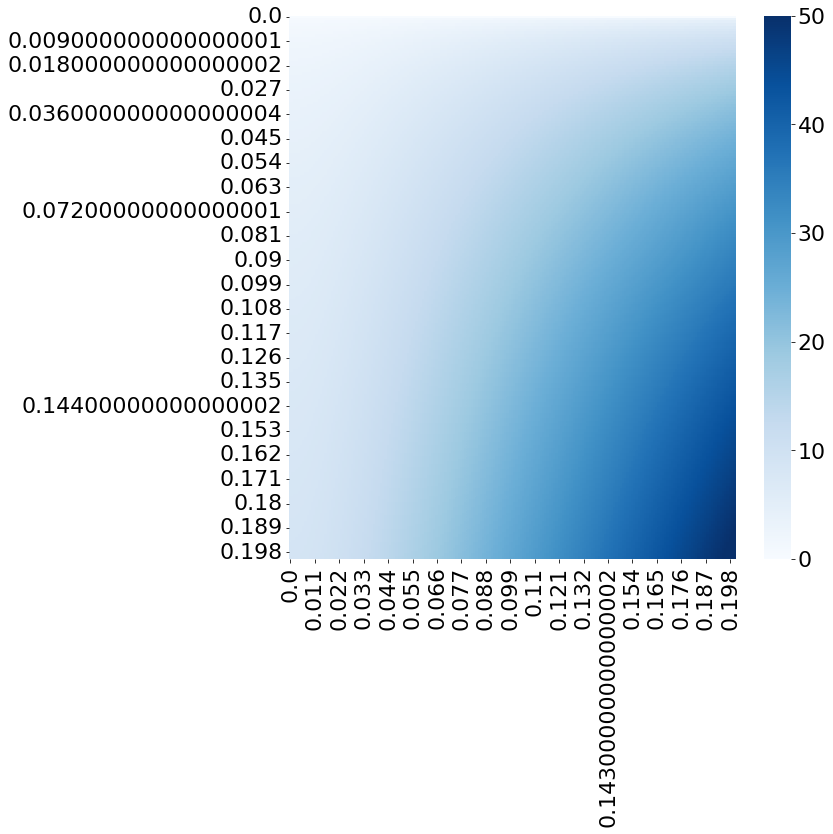

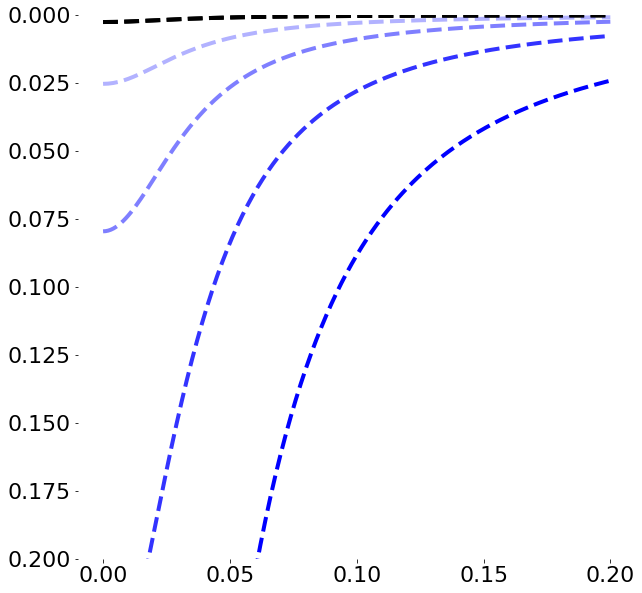

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal
from scipy.fft import fftshift
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

import networkx as nx
import numpy as np
import pandas as pd


dt=0.1
N=100
d=-1
beta=50



connection_probability = np.arange(0,0.201,0.001)# np.logspace(-6,0,7)#
mean_synaptic_connectivity =  np.arange(0,0.201,0.001)#np.logspace(-6,0,7)#

# connection_probability =  np.logspace(-6,0,7)#
# mean_synaptic_connectivity =  np.logspace(-6,0,7)#
Spectral_radius = np.zeros((len(connection_probability),len(mean_synaptic_connectivity)))
Spectral_radius_o = np.zeros((len(connection_probability),len(mean_synaptic_connectivity)))
Spectral_radius_threshold = np.zeros((len(connection_probability),len(mean_synaptic_connectivity)))
Spectral_radius_threshold_o = np.zeros((len(connection_probability),len(mean_synaptic_connectivity)))

for s1 in range(len(connection_probability)):

  for s2 in range(len(mean_synaptic_connectivity)):
    rho =connection_probability[s1]#connectoin probability
    f=0.8#proportion of e vs i cells/cortical
    sigma_e_2 = 0.005
    sigma_i_2 = 0.005
    mu_e= mean_synaptic_connectivity[s2]#0.8 so that the variance scales like 1/N
    mu_i= -f/(1-f)*mu_e
    sigma_h=10

    Spectral_radius[s1][s2] =  np.sqrt(N*rho*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mu_e)**2)*beta**2/(np.pi*np.sqrt(4*sigma_h*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*sigma_h)))
    Spectral_radius_o[s1][s2] =  np.sqrt(N*rho*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mu_e)**2)*beta**2/(np.pi*np.sqrt(4*0*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*0)))
    
    if Spectral_radius[s1][s2]<1:
      Spectral_radius_threshold[s1][s2]=1
    if Spectral_radius_o[s1][s2]<1:
      Spectral_radius_threshold_o[s1][s2]=1
    


# plt.yticks(np.arange(0, 13, 4))
# plt.yticks(np.arange(0, 13, 4))
plt.rcParams.update({'font.size': 22})
df = pd.DataFrame(Spectral_radius, columns=mean_synaptic_connectivity, index=connection_probability)
df_o = pd.DataFrame(Spectral_radius_o,  columns=mean_synaptic_connectivity, index=connection_probability)

df_th = pd.DataFrame(Spectral_radius_threshold, columns=mean_synaptic_connectivity, index=connection_probability)
df_th_o = pd.DataFrame(Spectral_radius_threshold_o, columns=mean_synaptic_connectivity, index=connection_probability)

plt.figure(figsize=(10,10))

# for pos in ['right', 'top', 'bottom', 'left']:
#    plt.gca().spines[pos].set_visible(False)
# plt.imshow(df, cmap='Blues', interpolation='nearest', aspect='equal')
# plt.colorbar(df,cax=None, ax=None, use_gridspec=True,)
# plt.show()

# sns.color_palette("Blues", as_cmap=True)
# plt.figure(figsize=(10,10))
# ax1=sns.heatmap(df_th, cmap="Blues")
# # ax1.set_xticks(xticks*ax1.get_xlim()[1])
# # ax1.set_yticks(yticks*ax1.get_ylim()[1])
# plt.show()

sns.color_palette("Blues", as_cmap=True)
plt.figure(figsize=(10,10))
ax2 = sns.heatmap(df_o, cmap="Blues", xticklabels = "auto", yticklabels = "auto",vmin=0, vmax=50)

# plt.show()
# sns.color_palette("Blues", as_cmap=True)
# plt.figure(figsize=(10,10))
# ax3 = sns.heatmap(df, cmap="Blues", xticklabels = "auto", yticklabels = "auto",vmin=0, vmax=50)

# plt.show()
# sns.color_palette("Blues", as_cmap=True)
# plt.figure(figsize=(10,10))
# ax4 = sns.heatmap(df_o, cmap="Blues", xticklabels = "auto", yticklabels = "auto",vmin=0, vmax=50)

# plt.show()

plt.figure(figsize=(10,10))
sig_h = [0, 0.01, 0.1,1, 10]#np.arange(0.0,1,0.01)#np.logspace(-6,2,9)
mue = np.arange(0,0.201,0.001)
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
# plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, len(sig_h)))))
stad_thresh_1 = np.zeros(len(mue))
stad_thresh_2 = np.zeros(len(mue))
stad_thresh_3 = np.zeros(len(mue))
stad_thresh_4 = np.zeros(len(mue))
stad_thresh_5 = np.zeros(len(mue))

stad_thresh_1 = 1/(N*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mue)**2)*beta**2/(np.pi*np.sqrt(4*sig_h[0]*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*sig_h[0])))
stad_thresh_2 = 1/(N*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mue)**2)*beta**2/(np.pi*np.sqrt(4*sig_h[1]*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*sig_h[1])))
stad_thresh_3 = 1/(N*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mue)**2)*beta**2/(np.pi*np.sqrt(4*sig_h[2]*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*sig_h[2])))
stad_thresh_4 = 1/(N*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mue)**2)*beta**2/(np.pi*np.sqrt(4*sig_h[3]*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*sig_h[3])))
stad_thresh_5 = 1/(N*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mue)**2)*beta**2/(np.pi*np.sqrt(4*sig_h[4]*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*sig_h[4])))

plt.plot(mue, stad_thresh_1, linewidth=4,linestyle="--" , color='black')
plt.plot(mue, stad_thresh_2, linewidth=4,linestyle="--" , color='blue', alpha=0.3)
plt.plot(mue, stad_thresh_3, linewidth=4,linestyle="--" , color='blue', alpha=0.5)
plt.plot(mue, stad_thresh_4, linewidth=4,linestyle="--" , color='blue',alpha=0.8)
plt.plot(mue, stad_thresh_5, linewidth=4,linestyle="--" , color='blue',alpha=1)

# for i in range(len(sig_h)):
#   stability_threshold = 1/(N*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mue)**2)*beta**2/(np.pi*np.sqrt(4*sig_h[i]*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*sig_h[i])))
  
#   plt.plot(mue, stability_threshold, linewidth=4,linestyle="--" , color='black')
  # plt.fill_between(mue, stability_threshold,step='pre',  alpha=0.1) 
plt.ylim(0.2, 0) 

plt.plot(mue, 1/(N*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mue)**2)*beta**2/(np.pi*np.sqrt(4*0*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*0))), linewidth=4, color='black', linestyle='--')


(0.15, 0.0)

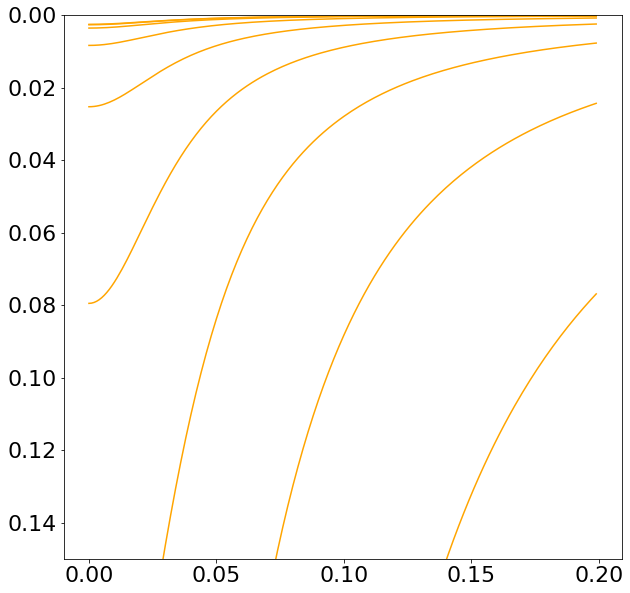

In [ ]:

T = 2000
dt=0.1
N=100
d=-1
beta=50
D =0.000


rho =0.05#connectoin probability
f=0.8#proportion of e vs i cells/cortical
sigma_e_2 = 0.005
sigma_i_2 = 0.005
mu_e= 0.08 #0.8 so that the variance scales like 1/N
mu_i= -f/(1-f)*mu_e
plt.figure(figsize=(10,10))
sig_h = np.logspace(-6,2,9)
mue = np.arange(0,0.2,0.001)
for i in range(len(sig_h)):
  plt.plot(mue, 1/(N*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*(mue)**2)*beta**2/(np.pi*np.sqrt(4*sig_h[i]*beta**2+1))*np.exp(-2*beta**2*0**2/(1+4*beta**2*sig_h[i]))), color='orange')

plt.ylim(0.15, 0) 

In [ ]:

#GRAPH  VISUALIZATION 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal
from scipy.fft import fftshift

import networkx as nx
import numpy as np
import pandas as pd

T = 300
dt=0.1
N=100
d=-1
beta=50
D =0.000


rho =0.05 #connectoin probability
f=0.8#proportion of e vs i cells/cortical
sigma_e_2 = 0.005
sigma_i_2 = 0.005
#AXEL: INCREASE MU_E TO INCREASE INSTABILITY AND FLUCTUATIONS AMPLITUDE
mu_e= 0.2 #0.8 so that the variance scales like 1/N
mu_i= -f/(1-f)*mu_e



#arrays for network dynamics 
u = np.zeros((N,T))
time=np.arange(0,T,1)
#environmental perturbations

 


W = np.zeros((N,N))
M_e=np.random.normal(mu_e, np.sqrt(sigma_e_2), size=(N,N))
M_i=np.random.normal(mu_i, np.sqrt(sigma_i_2), size=(N,N))

List = np.zeros(N);
for i in range(N):
  for j in range(N):
    P_connectivity = np.random.rand()
    if (P_connectivity<rho):
      if (j<int(f*N)):
        List[j] = M_e[i][j];
      else:
        List[j] = M_i[i][j];
    else:
      List[j] = 0;
  np.random.shuffle(List)  
  for j in range(N):
    if i==j:
      W[i][j]=0
    else:
      W[i][j]=List[j]
row_sum=np.zeros(N)
for i in range(N):
  row_sum[i] =(np.sum(W[i][:]))
  number_of_nonzero_entries=0
  for j in range(N):
    if W[i][j]!=0:
      number_of_nonzero_entries = number_of_nonzero_entries+1
  for j in range(N):
    if W[i][j]!=0:  
      W[i][j]=W[i][j]-row_sum[i]/number_of_nonzero_entries


   
#variance connectivity matrix - scales like 1/N by construction
sigma_2 = rho*(f*sigma_e_2+(1-f)*sigma_i_2+f/(1-f)*mu_e**2)
print(W)
print(np.var(W),sigma_2)
print(np.mean(W))
# for i in range(N):
#   print(np.sum(W[i][:]))




# plt.plot(time,perturbations, color='red',  linewidth=4, alpha=0.5)
# plt.ylim(-1.5, 1.5) 
# plt.show()


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.23918588 0.         0.        ]]
0.005810156751201358 0.008250000000000004
-4.024558464266192e-20


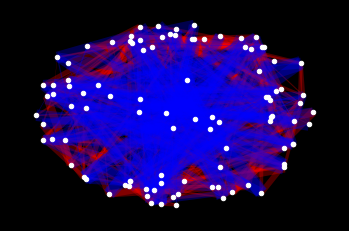

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


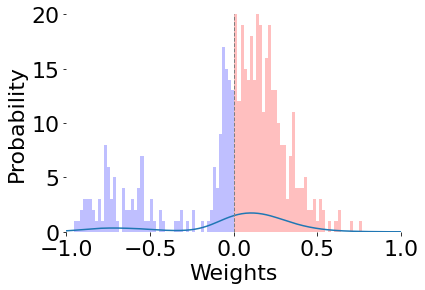

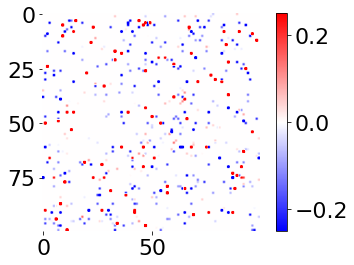

In [ ]:
#4 Graph representation- # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_circular.html
A = W
G = nx.from_numpy_array(A)
G.edges(data=True)
pos = nx.spring_layout(G, seed=7)  # random positions nodes
#pos = nx.spectral_layout(G)
#pos = nx.circular_layout(G)  # circular layout
#pos =nx.random_layout(G, seed=1)

#excitatory nodes
e_ex = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0]
edges_ex = tuple(e_ex)
weights_ex = tuple([15*G[e][f]['weight'] for e,f in edges_ex]) 

#inhibitory nodes
e_in = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0]
edges_in = tuple(e_in)
weights_in = tuple([15*G[e][f]['weight'] for e,f in edges_in]) 

# nodes
nx.draw_networkx_nodes(G, pos, node_size=20, node_color='black')

# edges
# nx.draw_networkx_edges(G, pos, edgelist=e_ex, width=weights_ex, alpha=0.5, edge_color=weights_ex, edge_cmap=plt.cm.Reds)
nx.draw_networkx_edges(G, pos, edgelist=e_ex, width=weights_ex, alpha=0.1, edge_color="red")
#nx.draw_networkx_edges(G, pos, edgelist=e_in, width=weights_in, alpha=0.5, edge_color=weights_in, edge_cmap=plt.cm.Blues)
nx.draw_networkx_edges(G, pos, edgelist=e_in, width=weights_in, alpha=0.1, edge_color="blue")
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.show()



W_flat = (W.flatten())
# plt.hist(W_flat[W_flat != 0], color="grey",bins=30, density=True)
plt.rcParams.update({'font.size': 22})
sns.distplot(W_flat[W_flat != 0], kde=True, bins=20, hist=False)
_, _, bars = plt.hist(W_flat[W_flat != 0], bins = 100, color="blue",alpha=0.25)
for bar in bars:
    if bar.get_x() > 0:
        bar.set_facecolor("red")
plt.axvline(x=0, linestyle='--',linewidth=1, color='grey')
# plt.hist(W_flat, bins='auto')
plt.xlabel('Weights')
plt.ylabel('Probability')
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.ylim(0, 20) 
plt.xlim(-1, 1) 
plt.show()



plt.rcParams.update({'font.size': 22})
plt.imshow(-W, cmap='bwr',vmin=-0.25,vmax=0.25)
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.colorbar()
plt.show()


[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


(1e-06, 110)

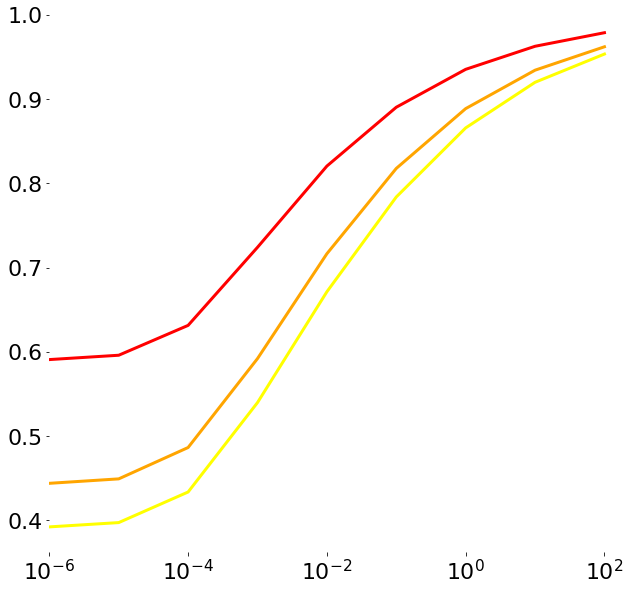

In [ ]:
#SUSCEPTIBILITY



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
from scipy.stats import pearsonr

import networkx as nx
import numpy as np
import pandas as pd




N=100#number of neurons
d=-1
dt=0.1
beta=50 #gain of Gaussian

#zero mean corrected connectivity matrix 
rho =0.05 #connectoin probability
f=0.8#proportion of e vs i cells/cortical
sigma_e = 0.005
sigma_i = 0.005
#AXEL: INCREASE MU_E TO INCREASE INSTABILITY AND FLUCTUATIONS AMPLITUDE
mu_e= 0.08 # so that the variance scales like 1/N
mu_i= -f/(1-f)*mu_e

sigma_2 = rho*(f*sigma_e+(1-f)*sigma_i+f/(1-f)*mu_e**2)
sigma_h=3

S = np.arange(-0.1,0.1,0.001)

Susceptibility_S = np.zeros(len(S))
Susceptibility_rho = np.zeros(len(S))
Susceptibility_mu = np.zeros(len(S))


for i in range(len(S)):
  g = 1+4*beta**2*sigma_h
  Susceptibility_S[i] = -2 * np.pi ** (-0.1e1 / 0.2e1) * np.sqrt(sigma_2 * (N - 1) * beta * rho * g ** (-0.1e1 / 0.2e1)) * S[i] * beta ** 2 / g * np.exp(-S[i] ** 2 * beta ** 2 / g)
S_o=0  
SIGMA_H = np.logspace(-6,2,9) 
print(SIGMA_H)
Integral_of_susceptibility_S = np.zeros(len(SIGMA_H))
Integral_of_susceptibility_rho = np.zeros(len(SIGMA_H))
Integral_of_susceptibility_mu = np.zeros(len(SIGMA_H))
for i in range(len(SIGMA_H)):
  gamma =  1+4*beta**2*SIGMA_H[i]
  Integral_of_susceptibility_S[i] = 2 * np.pi ** (-0.1e1 / 0.2e1) * np.sqrt(beta) * gamma**(-0.1e1 / 0.4e1) * np.sqrt(abs(sigma_2 * (N - 1) * rho))
  Integral_of_susceptibility_rho[i] =np.sqrt(beta) * np.exp(-beta ** 2 / gamma * (S_o ** 2)) * np.pi ** (-0.1e1 / 0.2e1) * gamma ** (-0.1e1 / 0.4e1) * np.sqrt(abs(sigma_2 * (N - 1)))
  Integral_of_susceptibility_mu[i] = -0.5641895835e-1 * abs(rho) * (np.sqrt((0.100e3 * f ** 2 * sigma_e - 0.100e3 * f ** 2 * sigma_i - 0.100e3 * f * sigma_e + 0.200e3 * f * sigma_i - 0.1e1 * f - 0.100e3 * sigma_i) / (-0.1e1 + f) / (f * sigma_e - 0.1e1 * f * sigma_i + sigma_i)) - 0.10e2) * np.exp(-0.1e1 * beta ** 2 / gamma * (S_o ** 2)) * abs(f) * np.sqrt(beta) * np.abs(N - 0.1e1) * (f * sigma_e - 0.1e1 * f * sigma_i + sigma_i) * (-0.1e1 + f) * np.abs(rho * (N - 0.1e1) * (f * sigma_e - 0.1e1 * f * sigma_i + sigma_i)) ** (-0.1e1 / 0.2e1) * gamma ** (-0.1e1 / 0.4e1) / np.abs(-0.1e1 + f) / f

# plt.plot(S,1/((np.abs(Susceptibility)+1)))
plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 22})
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.plot(SIGMA_H,1/(Integral_of_susceptibility_S+1), linewidth=3, color='red')
# plt.plot(SIGMA_H,Integral_of_susceptibility_S, linewidth=3, color='black', alpha=0.4)
plt.plot(SIGMA_H,1/(Integral_of_susceptibility_rho+1),linewidth=3, color='yellow')
plt.plot(SIGMA_H,1/(Integral_of_susceptibility_mu+1),linewidth=3, color='orange')
# plt.plot(SIGMA_H,Integral_of_susceptibility_S)
plt.xscale("log")
plt.xlim(1e-6,110)